# This notebook contains the Gene Suitability Test for the 1st orfN-catalyzed reaction (rxn 13833). It contains the following sections:
### Gap-filling
### Min and Max orfN flux limits
### Perturbations through orfN reaction
### PCA (original + annotated)
### orfN reaction flux vs biomass flux

In [1]:
# importing PA14 metabolic model of P. aeruginosa
import cobra
from cobra import Model, Reaction, Metabolite
model = cobra.io.read_sbml_model("iSD1509MModel.xml")
model

Name,iSDXXXX
Memory address,104cd9b50
Number of metabolites,1642
Number of reactions,2021
Number of genes,1510
Number of groups,7
Objective expression,1.0*BIOMASS_PA14_v27M - 1.0*BIOMASS_PA14_v27M_reverse_0dc58
Compartments,"cytosol, extracellular space, periplasm"


In [2]:
default_bounds = {}
for rs in model.reactions:
    default_bounds[rs.id] = rs.bounds
    
# Making resetting model function
def reset_model(model, def_bounds, obj):
    for rs in model.reactions:
        try:
            rs.bounds = def_bounds[rs.id]
        except KeyError:
            pass
        
        rs.objective_coefficient = 0
        
        if rs.id == obj:
            rs.objective_coefficient = 1

reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')

## Gap-filling

In [3]:
# Checking current biomass reaction
biomass_rxn = model.reactions.get_by_id('BIOMASS_PA14_v27M')
print(f"Reaction ID: {biomass_rxn.id}")
print(f"Reaction name: {biomass_rxn.name}")
print(f"Reaction equation: {biomass_rxn.reaction}")
print(f"Lower bound: {biomass_rxn.lower_bound}")
print(f"Upper bound: {biomass_rxn.upper_bound}")
print(f"Objective coefficient: {biomass_rxn.objective_coefficient}")
print(f"Metabolites:")
for metabolite, coefficient in biomass_rxn.metabolites.items():
    print(f"{metabolite.id}: {coefficient}")


Reaction ID: BIOMASS_PA14_v27M
Reaction name: Changed stoichiometry from original (RNA, Glycogen, Formula Wts), scaled
Reaction equation: 0.0002629250362 2fe2s_c + 0.0218082581186 PA_core_lipidA_c + 0.5114586280634 ala__L_c + 0.3347179859799 arg__L_c + 0.1163039750092 asn__L_c + 0.2337604590002 asp__L_c + 70.4958884983908 atp_c + 0.0072362236879 clpn160_c + 0.0038348089867 clpn161_c + 0.000348176308 clpn180_c + 0.0109468579074 clpn181_c + 0.0004942642694 clpn_pa_17_0_cyc_c + 0.000900875762 clpn_pa_19_0_cyc_c + 0.0001971967204 coa_c + 0.161115895419 ctp_c + 0.0442179279331 cys__L_c + 0.0127328513395 datp_c + 0.0250500903207 dctp_c + 0.0250500903207 dgtp_c + 0.0127328513395 dttp_c + 0.266984355176 gln__L_c + 0.1886815390631 glu__L_c + 0.367824371436 gly_c + 0.1815236055988 glycogen_c + 0.1610581353701 gtp_c + 66.0234962815776 h2o_c + 0.095542994587 his__L_c + 0.1833822575686 ile__L_c + 0.545109630509 leu__L_c + 0.1268098853154 lys__L_c + 0.0904990729257 met__L_c + 0.0002629250362 mlthf_c

In [4]:
-0.0218082581186/2

-0.0109041290593

In [5]:
# Adding LPS B and LPS A to a new biomass reaction
new_biomass_rxn = Reaction(id="BIOMASS_PA14_v27M_LPSA_B")
new_biomass_rxn.name = "Biomass reaction with PA_core_lipidA_c removed and LPS A and LPS B added compared to BIOMASS_PA14_v27M"
new_biomass_rxn.lower_bound = 0.0
new_biomass_rxn.upper_bound = 999999.0
model.add_reactions([new_biomass_rxn])
new_biomass_rxn.add_metabolites({
    'datp_c': -0.0127328513395, 
    'dctp_c': -0.0250500903207, 
    'dgtp_c': -0.0250500903207, 
    'dttp_c': -0.0127328513395,
    'ctp_c': -0.161115895419, 
    'gtp_c': -0.1610581353701, 
    'utp_c': -0.0818728251174, 
    'ala__L_c': -0.5114586280634, 
    'arg__L_c': -0.3347179859799,
    'asn__L_c': -0.1163039750092, 
    'asp__L_c': -0.2337604590002, 
    'cys__L_c': -0.0442179279331, 
    'gln__L_c': -0.266984355176,
    'glu__L_c': -0.1886815390631, 
    'gly_c': -0.367824371436, 
    'his__L_c': -0.095542994587, 
    'ile__L_c': -0.1833822575686, 
    'leu__L_c': -0.545109630509,
    'lys__L_c': -0.1268098853154, 
    'met__L_c': -0.0904990729257, 
    'phe__L_c': -0.1554757214595, 
    'pro__L_c': -0.2231799745834,
    'ser__L_c': -0.2438663808951, 
    'thr__L_c': -0.1851584772934, 
    'trp__L_c': -0.0656048789199, 
    'tyr__L_c': -0.1111131649483,
    'val__L_c': -0.3007573879843, 
    'glycogen_c': -0.1815236055988, 
    'pe160_c': -0.0440332489728, 
    'pe180_c': -0.0019052207574,
    'pe161_c': -0.0186791573555, 
    'pe181_c': -0.0627923456608, 
    'pe_pa_17_0_cyc_c': -0.0012523828755, 
    'pe_pa_19_0_cyc_c': -0.0027845534146,
    'pg160_c': -0.0115620050953, 
    'pg180_c': -0.0003882433662, 
    'pg161_c': -0.0034971315335, 
    'pg181_c': -0.0106413977194, 
    'pg_pa_17_0_cyc_c': -0.0007294269305,
    'pg_pa_19_0_cyc_c': -0.0014588538609, 
    'clpn160_c': -0.0072362236879, 
    'clpn180_c': -0.000348176308, 
    'clpn161_c': -0.0038348089867,
    'clpn181_c': -0.0109468579074, 
    'clpn_pa_17_0_cyc_c': -0.0004942642694, 
    'clpn_pa_19_0_cyc_c': -0.000900875762, 
    'peptido_pa_c': -0.0629017241191,
    'PA_LPS_A_c': -0.0109041290593, 
    'PA_LPS_B_c': -0.0109041290593, 
    'ptrc_c': -0.0760531829063, 
    'q9h2_c': -0.0002629250362, 
    'mlthf_c': -0.0002629250362, 
    'coa_c': -0.0001971967204, 
    'thmpp_c': -0.0002629250362, 
    '2fe2s_c': -0.0002629250362, 
    'atp_c': -70.4958884983908,
    'h2o_c': -66.0234962815776, 
    'h_c': 70.413945350228, 
    'ppi_c': 0.5615558873897, 
    'adp_c': 70.413945350228, 
    'pi_c': 70.413945350228})

In [6]:
# Changing objective function to new biomass reaction
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')

In [7]:
# Checking new biomass reaction
biomass_rxn = model.reactions.get_by_id('BIOMASS_PA14_v27M_LPSA_B')
print(f"Reaction ID: {biomass_rxn.id}")
print(f"Reaction name: {biomass_rxn.name}")
print(f"Reaction equation: {biomass_rxn.reaction}")
print(f"Lower bound: {biomass_rxn.lower_bound}")
print(f"Upper bound: {biomass_rxn.upper_bound}")
print(f"Objective coefficient: {biomass_rxn.objective_coefficient}")
print(f"Metabolites:")
for metabolite, coefficient in biomass_rxn.metabolites.items():
    print(f"{metabolite.id}: {coefficient}")

Reaction ID: BIOMASS_PA14_v27M_LPSA_B
Reaction name: Biomass reaction with PA_core_lipidA_c removed and LPS A and LPS B added compared to BIOMASS_PA14_v27M
Reaction equation: 0.0002629250362 2fe2s_c + 0.0109041290593 PA_LPS_A_c + 0.0109041290593 PA_LPS_B_c + 0.5114586280634 ala__L_c + 0.3347179859799 arg__L_c + 0.1163039750092 asn__L_c + 0.2337604590002 asp__L_c + 70.4958884983908 atp_c + 0.0072362236879 clpn160_c + 0.0038348089867 clpn161_c + 0.000348176308 clpn180_c + 0.0109468579074 clpn181_c + 0.0004942642694 clpn_pa_17_0_cyc_c + 0.000900875762 clpn_pa_19_0_cyc_c + 0.0001971967204 coa_c + 0.161115895419 ctp_c + 0.0442179279331 cys__L_c + 0.0127328513395 datp_c + 0.0250500903207 dctp_c + 0.0250500903207 dgtp_c + 0.0127328513395 dttp_c + 0.266984355176 gln__L_c + 0.1886815390631 glu__L_c + 0.367824371436 gly_c + 0.1815236055988 glycogen_c + 0.1610581353701 gtp_c + 66.0234962815776 h2o_c + 0.095542994587 his__L_c + 0.1833822575686 ile__L_c + 0.545109630509 leu__L_c + 0.1268098853154 l

In [8]:
# Ensuring old biomass reaction is no longer objective function
old_biomass = model.reactions.get_by_id('BIOMASS_PA14_v27M')
old_biomass.objective_coefficient

0.0

## Gene suitability test for orfN reaction #1 - Rxn 13833
### Maximizing flux through rxn 13833

In [9]:
orfN_rxn1 = model.reactions.get_by_id('rxn13833')
print(orfN_rxn1)

rxn13833: uacfuc_c + udcpp_c <=> udcppf_c + ump_c


In [10]:
# for rxns in orfN_rxn:
    # reset model
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
    
    # Limit growth to minimum of 0.05
model.reactions.BIOMASS_PA14_v27M_LPSA_B.bounds = 0.05, 1000

    # Make rxn of interest the objective function
model.reactions.BIOMASS_PA14_v27M_LPSA_B.objective_coefficient = 0
orfN_rxn1.objective_coefficient = 1
    
    # Optimize model to maximize flux through rxn
max_flux = model.optimize(objective_sense='maximize')
print(max_flux.objective_value)

max_flux_val = max_flux.objective_value

0.017247603588736515


### Minimizing flux through reaction 13833

In [11]:
# for rxns in reactions_murA:
    #reset model
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
    
    # Limit growth to minimum of 0.05
model.reactions.BIOMASS_PA14_v27M_LPSA_B.bounds = 0.05, 1000

    # Make rxn of interest the objective function
model.reactions.BIOMASS_PA14_v27M_LPSA_B.objective_coefficient = 0
orfN_rxn1.objective_coefficient = 1
    
    # Optimize model to minimize flux through rxn
min_flux = model.optimize(objective_sense='minimize')
print(min_flux.objective_value)
    
min_flux_val = min_flux.objective_value

0.0005452064529649999


In [12]:
# State newly determined bounds for reaction
min_flux_val, max_flux_val

(0.0005452064529649999, 0.017247603588736515)

### Perturbations through orfN reaction 13833

In [13]:
import numpy as np
import pandas as pd
my_flux_vals = np.linspace(min_flux_val, max_flux_val, num=400)
my_flux_vals

array([0.00054521, 0.00058707, 0.00062893, 0.00067079, 0.00071265,
       0.00075451, 0.00079637, 0.00083823, 0.00088009, 0.00092195,
       0.00096381, 0.00100567, 0.00104753, 0.00108939, 0.00113126,
       0.00117312, 0.00121498, 0.00125684, 0.0012987 , 0.00134056,
       0.00138242, 0.00142428, 0.00146614, 0.001508  , 0.00154986,
       0.00159172, 0.00163358, 0.00167544, 0.0017173 , 0.00175917,
       0.00180103, 0.00184289, 0.00188475, 0.00192661, 0.00196847,
       0.00201033, 0.00205219, 0.00209405, 0.00213591, 0.00217777,
       0.00221963, 0.00226149, 0.00230335, 0.00234521, 0.00238707,
       0.00242894, 0.0024708 , 0.00251266, 0.00255452, 0.00259638,
       0.00263824, 0.0026801 , 0.00272196, 0.00276382, 0.00280568,
       0.00284754, 0.0028894 , 0.00293126, 0.00297312, 0.00301498,
       0.00305685, 0.00309871, 0.00314057, 0.00318243, 0.00322429,
       0.00326615, 0.00330801, 0.00334987, 0.00339173, 0.00343359,
       0.00347545, 0.00351731, 0.00355917, 0.00360103, 0.00364

In [14]:
# reset objective function to biomass
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
# Checking objective function
for reactions in model.reactions:
    if reactions.objective_coefficient == 1:
        print(f'The objective function is: {reactions.id}')

The objective function is: BIOMASS_PA14_v27M_LPSA_B


In [15]:
orfN_rxn1.bounds = 0.01004757, 0.01004757

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

0.9214463571880186


In [16]:
# Model flux vector corresponding with this solution
solution.fluxes

solution_df = solution.to_frame()
solution_df = solution_df[solution_df['fluxes'] != 0]
solution_df

,fluxes,reduced_costs
3HAACOAT60,-0.873515,-0.0
3HAD100,0.804359,0.0
3HAD120,0.388703,0.0
3HAD121,0.415656,0.0
3HAD140,0.250391,0.0
...,...,...
rJB00277,0.010048,0.0
rxn00295,0.010048,0.0
EX_itacon_e,21.272315,0.0
BIOMASS_PA14_v27M,0.664103,0.0


In [17]:
orfN_rxn1.bounds = 0.000545206452965, 0.000545206452965

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

0.05000000000000001


In [18]:
orfN_rxn1.bounds = 0.017247603588736515, 0.017247603588736515

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

1.5817497660692346


In [19]:
# Create empty list to input rows for each orfN flux
row_list = []
# Loop through orfN fluxes to get corresponding network fluxes
for flux in my_flux_vals:
    # Reset model
    # reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
    # reset_model function doesn't finish running, so leaving it out (shouldn't impact results)
    # Set orfN flux bounds
    orfN_rxn1.bounds = flux, flux
    solution = model.optimize(objective_sense='maximize')
    row_list.append(solution.fluxes)

matrix_df = pd.DataFrame(row_list)
matrix_df

,1PPDCRc,2AGPE140tipp,2AGPE141tipp,2AGPG140tipp,2AGPG141tipp,2DHGLCK,2DHGLCNkt_tpp,2HH24DDH1,2MAHMP,3_4DHBZ1t_pp,...,BIOMASS_PA14_v27M,BIOMASS_PA14_v27M_ANA,PYOO2exNET,AHGDx,SHGO,ACTD2_SS,23DHBSpp,ACPS1,ACPpds,BIOMASS_PA14_v27M_LPSA_B
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.540563e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.536702e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053839
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.532841e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057678
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.528980e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061517
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.525119e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.544424e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.566394
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.158318e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.570233
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.722120e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.574072
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.861060e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.577911


In [20]:
print(matrix_df['rxn13833'])

fluxes    0.000545
fluxes    0.000587
fluxes    0.000629
fluxes    0.000671
fluxes    0.000713
            ...   
fluxes    0.017080
fluxes    0.017122
fluxes    0.017164
fluxes    0.017206
fluxes    0.017248
Name: rxn13833, Length: 400, dtype: float64


In [21]:
matrix_df = matrix_df.drop('rxn13833', axis=1)
matrix_df
matrix_df.shape

(400, 2021)

In [22]:
print(matrix_df['rxn13833'])

KeyError: 'rxn13833'

In [ ]:
# Adding column of orfN flux values to dataframe for annotation
# orfN1_flux_values = my_flux_vals.tolist()
# orfN1_flux_values

In [ ]:
# matrix_df["orfN Flux Values"] = orfN1_flux_values

In [ ]:
# matrix_df.shape

### PCA

In [23]:
# Importing PCA class from sklearn
from sklearn.decomposition import PCA

# Fit PCA model to matrix
pca = PCA()
pca.fit(matrix_df)

PCA()

In [24]:
# Looking at the principal components formed
components = pca.components_
components

array([[ 4.02542207e-17,  4.43879308e-17, -5.76221142e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -6.55864800e-01],
       [ 1.81277121e-06, -4.29329846e-07, -6.56729019e-07, ...,
        -0.00000000e+00, -0.00000000e+00,  6.75524182e-02],
       [-1.93982882e-05, -8.43657360e-06,  8.91784724e-06, ...,
        -0.00000000e+00, -0.00000000e+00,  1.35168860e-01],
       ...,
       [ 6.28756033e-02, -2.82745409e-02,  4.23269763e-03, ...,
        -0.00000000e+00, -0.00000000e+00,  9.32946876e-02],
       [ 2.62060102e-02, -1.07905829e-01,  7.43266710e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.90416967e-02],
       [ 2.24664133e-02,  2.21374398e-02, -3.99077908e-02, ...,
         0.00000000e+00,  0.00000000e+00, -6.17250735e-03]])

In [25]:
# Explained variance ratio of each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[1.00000000e+00 3.64798643e-24 8.00059683e-26 2.35195332e-26
 2.19972294e-26 3.69420923e-27 1.14722760e-27 8.62976158e-28
 6.69490584e-28 5.92489522e-28 5.26200972e-28 4.51074809e-28
 2.69588176e-28 2.44716499e-28 1.29521249e-28 8.74337050e-29
 5.09275269e-29 4.92138705e-29 4.69391446e-29 3.50572547e-29
 3.23754505e-29 2.52578283e-29 2.17203190e-29 1.88859459e-29
 1.66401843e-29 1.56836381e-29 1.44324788e-29 1.40447024e-29
 1.34850836e-29 1.15908302e-29 9.92458297e-30 9.87545886e-30
 6.83798659e-30 5.44424294e-30 4.87963170e-30 4.03093185e-30
 3.29513904e-30 3.05346873e-30 2.66142381e-30 2.55577264e-30
 2.20997040e-30 2.02060119e-30 1.98422427e-30 1.90328207e-30
 1.79733428e-30 1.62368863e-30 1.57617918e-30 1.43713222e-30
 1.24870845e-30 1.18037403e-30 9.22479155e-31 8.45417536e-31
 7.88860905e-31 6.78136121e-31 6.52748188e-31 5.95739738e-31
 5.73386451e-31 5.52575601e-31 5.13591755e-31 4.70397911e-31
 3.86025230e-31 3.02485838e-31 2.64845785e-31 2.37124233e-31
 2.23149235e-31 2.166548

In [26]:
# Keeping only first 2 principial components
pca_2 = PCA(n_components=2)
pca_2.fit(matrix_df)
print(pca_2.explained_variance_ratio_)

[1.00000000e+00 3.64799013e-24]


In [27]:
# Transform original matrix to principal component space
pca_matrix = pca_2.transform(matrix_df)
print(pca_matrix)
pca_matrix.shape

[[ 1.16773287e+00  4.33000857e-13]
 [ 1.16187957e+00  5.56804602e-13]
 [ 1.15602627e+00  9.15281739e-13]
 [ 1.15017297e+00  1.10221554e-12]
 [ 1.14431968e+00 -4.27713420e-14]
 [ 1.13846638e+00  1.44675938e-13]
 [ 1.13261308e+00  4.81392703e-13]
 [ 1.12675978e+00 -6.90655866e-13]
 [ 1.12090649e+00  2.15068241e-12]
 [ 1.11505319e+00 -2.88334634e-12]
 [ 1.10919989e+00 -1.30954969e-12]
 [ 1.10334659e+00 -8.28628832e-13]
 [ 1.09749330e+00  4.68319827e-13]
 [ 1.09164000e+00 -5.39374101e-13]
 [ 1.08578670e+00 -2.87339597e-13]
 [ 1.07993340e+00 -3.06976666e-14]
 [ 1.07408011e+00  1.77441395e-13]
 [ 1.06822681e+00 -7.23934801e-13]
 [ 1.06237351e+00  5.87405125e-13]
 [ 1.05652021e+00  2.00145456e-12]
 [ 1.05066692e+00 -1.55601920e-12]
 [ 1.04481362e+00 -1.18720311e-12]
 [ 1.03896032e+00  1.63462299e-12]
 [ 1.03310702e+00  5.07247022e-13]
 [ 1.02725372e+00 -5.72319969e-13]
 [ 1.02140043e+00 -3.23963079e-13]
 [ 1.01554713e+00  1.19200483e-12]
 [ 1.00969383e+00 -1.03220210e-12]
 [ 1.00384053e+00 -2

(400, 2)

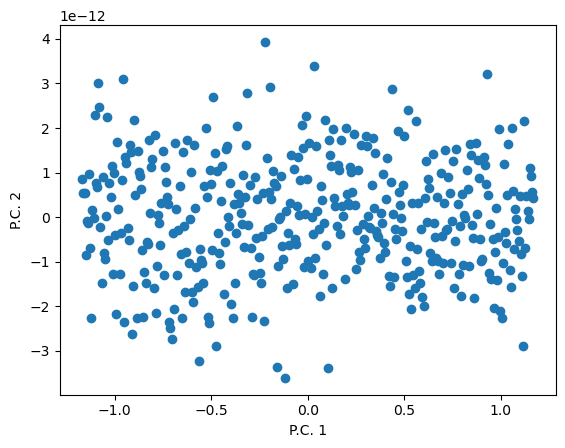

In [28]:
import matplotlib.pyplot as plt

# Graph first two principal components
x = pca_matrix[:, 0]
y = pca_matrix[:, 1]
plt.scatter(x,y)
plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

In [43]:
# Adding column of orfN flux values to dataframe for annotation
matrix_df_2 = pd.DataFrame(row_list)
orfN1_flux_values = my_flux_vals.tolist()
orfN1_flux_values

[0.0005452064529649999,
 0.0005870670974155552,
 0.0006289277418661103,
 0.0006707883863166655,
 0.0007126490307672207,
 0.0007545096752177758,
 0.000796370319668331,
 0.0008382309641188862,
 0.0008800916085694413,
 0.0009219522530199965,
 0.0009638128974705517,
 0.0010056735419211068,
 0.0010475341863716622,
 0.0010893948308222173,
 0.0011312554752727724,
 0.0011731161197233277,
 0.0012149767641738828,
 0.001256837408624438,
 0.0012986980530749932,
 0.0013405586975255483,
 0.0013824193419761034,
 0.0014242799864266588,
 0.0014661406308772139,
 0.001508001275327769,
 0.0015498619197783243,
 0.0015917225642288796,
 0.0016335832086794345,
 0.0016754438531299898,
 0.0017173044975805451,
 0.0017591651420311,
 0.0018010257864816553,
 0.0018428864309322107,
 0.0018847470753827656,
 0.0019266077198333209,
 0.001968468364283876,
 0.002010329008734431,
 0.0020521896531849864,
 0.0020940502976355417,
 0.0021359109420860966,
 0.002177771586536652,
 0.0022196322309872073,
 0.002261492875437762,
 0

In [44]:
matrix_df_2["orfN Flux Values"] = orfN1_flux_values
matrix_df_2.shape

(400, 2023)

In [45]:
# Dropping original orfN flux column
matrix_df_2 = matrix_df_2.drop('rxn13833', axis=1)
matrix_df_2
matrix_df_2.shape

(400, 2022)

In [46]:
# Fit PCA model to matrix
pca_annot = PCA()
pca_annot.fit(matrix_df_2)

PCA()

In [47]:
# Explained variance ratio of each principal component
explained_variance_2 = pca_annot.explained_variance_ratio_
print(explained_variance_2)

[1.00000000e+00 3.64780324e-24 8.00018724e-26 2.35182320e-26
 2.19953949e-26 3.69415950e-27 1.14726243e-27 8.62898679e-28
 6.69513569e-28 5.92459501e-28 5.26280122e-28 4.51106511e-28
 2.69554950e-28 2.44695878e-28 1.29558467e-28 8.74087162e-29
 5.09223870e-29 4.92070020e-29 4.69301947e-29 3.50449564e-29
 3.23553689e-29 2.53022053e-29 2.17270651e-29 1.88836184e-29
 1.66548440e-29 1.56947902e-29 1.44484511e-29 1.40271007e-29
 1.34892690e-29 1.15933640e-29 9.92054856e-30 9.89827671e-30
 6.90251367e-30 5.44014986e-30 4.86996255e-30 4.02869648e-30
 3.30352863e-30 3.05682545e-30 2.64065346e-30 2.55661958e-30
 2.20970095e-30 2.02079109e-30 1.97617648e-30 1.90186415e-30
 1.78948688e-30 1.62354302e-30 1.57662170e-30 1.43977854e-30
 1.23912297e-30 1.18254210e-30 9.25550567e-31 8.47001888e-31
 7.88860905e-31 6.79894783e-31 6.51221223e-31 6.00385976e-31
 5.66430434e-31 5.54232308e-31 5.14705059e-31 4.72873632e-31
 3.86329209e-31 3.03401816e-31 2.64309354e-31 2.36992087e-31
 2.22428793e-31 2.162941

In [48]:
# Keeping only first 2 principial components
pca_annot_2 = PCA(n_components=2)
pca_annot_2.fit(matrix_df_2)
print(pca_annot_2.explained_variance_ratio_)

[1.00000000e+00 3.64780511e-24]


In [49]:
# Transform original matrix to principal component space
pca_matrix_annot = pca_annot_2.transform(matrix_df_2)
print(pca_matrix_annot)
pca_matrix_annot.shape

[[ 1.16776273e+00  4.32973102e-13]
 [ 1.16190928e+00  5.56804602e-13]
 [ 1.15605583e+00  9.15267862e-13]
 [ 1.15020239e+00  1.10222942e-12]
 [ 1.14434894e+00 -4.27713420e-14]
 [ 1.13849549e+00  1.44675938e-13]
 [ 1.13264205e+00  4.81364948e-13]
 [ 1.12678860e+00 -6.90655866e-13]
 [ 1.12093515e+00  2.15068241e-12]
 [ 1.11508170e+00 -2.88336022e-12]
 [ 1.10922826e+00 -1.30956357e-12]
 [ 1.10337481e+00 -8.28642710e-13]
 [ 1.09752136e+00  4.68319827e-13]
 [ 1.09166791e+00 -5.39374101e-13]
 [ 1.08581447e+00 -2.87325719e-13]
 [ 1.07996102e+00 -3.07115444e-14]
 [ 1.07410757e+00  1.77455273e-13]
 [ 1.06825413e+00 -7.23948679e-13]
 [ 1.06240068e+00  5.87377369e-13]
 [ 1.05654723e+00  2.00148231e-12]
 [ 1.05069378e+00 -1.55599145e-12]
 [ 1.04484034e+00 -1.18720311e-12]
 [ 1.03898689e+00  1.63463687e-12]
 [ 1.03313344e+00  5.07247022e-13]
 [ 1.02727999e+00 -5.72306091e-13]
 [ 1.02142655e+00 -3.23976956e-13]
 [ 1.01557310e+00  1.19201871e-12]
 [ 1.00971965e+00 -1.03221598e-12]
 [ 1.00386621e+00 -2

(400, 2)

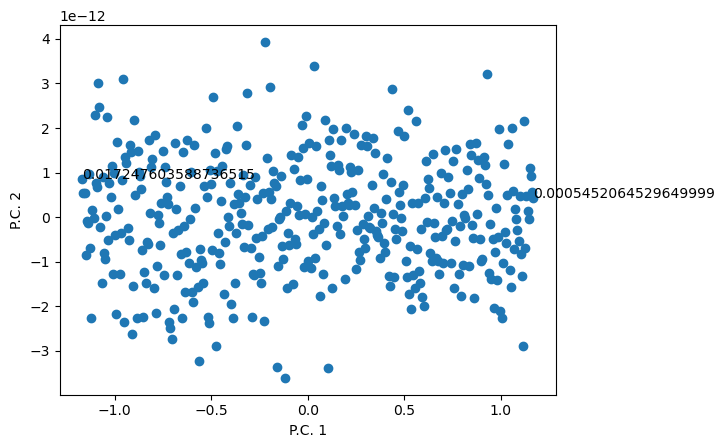

In [50]:
# Plot the first two principal components
plt.scatter(pca_matrix_annot[:, 0], pca_matrix_annot[:, 1])

# Index for first and last points
annotate_index = [0, -1]

# Annotate first and last points
for i in annotate_index:
    x, y = pca_matrix_annot[i, :]
    plt.annotate(orfN1_flux_values[i], (x, y))
    
# Index for min y value
# min_y_value = pca_matrix[:, 1].argmin()

# Annotate point with min y value
# x, y = pca_matrix_2[min_y_value, :]
# plt.annotate(orfN1_flux_values[min_y_value], (x, y))

plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

#### P.C. 1 seems negatively correlated with growth. P.C. 2 is neglibible because the axis is so small.

### Graph orfN Rxn 13833 Fluxes vs. Resulting Biomass Function

In [59]:
orfN_growth_df = pd.DataFrame()
orfN_growth_df["orfN Fluxes"] = orfN1_flux_values
orfN_growth_df

,orfN Fluxes
0,0.000545
1,0.000587
2,0.000629
3,0.000671
4,0.000713
...,...
395,0.017080
396,0.017122
397,0.017164
398,0.017206


In [61]:
# Create empty list to input growth values for each orfN flux
growth_list = []
# Loop through orfN fluxes to get corresponding growth values
for flux in orfN1_flux_values:
    # Reset model
    # reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
    # Set orfN flux bounds
    orfN_rxn1.bounds = flux, flux
    solution = model.optimize(objective_sense='maximize')
    growth_list.append(solution.objective_value)
growth_list

[0.049999999999999996,
 0.05383897184478505,
 0.05767794368957009,
 0.06151691553435514,
 0.06535588737914019,
 0.06919485922392524,
 0.0730338310687103,
 0.07687280291349534,
 0.08071177475828038,
 0.08455074660306544,
 0.08838971844785048,
 0.09222869029263553,
 0.0960676621374206,
 0.09990663398220563,
 0.10374560582699068,
 0.10758457767177573,
 0.11142354951656078,
 0.11526252136134582,
 0.11910149320613088,
 0.12294046505091591,
 0.12677943689570098,
 0.13061840874048603,
 0.1344573805852711,
 0.1382963524300561,
 0.14213532427484116,
 0.14597429611962623,
 0.14981326796441125,
 0.15365223980919634,
 0.15749121165398136,
 0.16133018349876643,
 0.16516915534355142,
 0.16900812718833652,
 0.17284709903312157,
 0.1766860708779066,
 0.18052504272269165,
 0.18436401456747664,
 0.18820298641226174,
 0.19204195825704684,
 0.19588093010183183,
 0.19971990194661687,
 0.20355887379140197,
 0.20739784563618696,
 0.211236817480972,
 0.2150757893257571,
 0.2189147611705421,
 0.222753733015327

In [62]:
# Add growth list to dataframe
orfN_growth_df["Growth Values"] = growth_list
orfN_growth_df

,orfN Fluxes,Growth Values
0,0.000545,0.050000
1,0.000587,0.053839
2,0.000629,0.057678
3,0.000671,0.061517
4,0.000713,0.065356
...,...,...
395,0.017080,1.566394
396,0.017122,1.570233
397,0.017164,1.574072
398,0.017206,1.577911


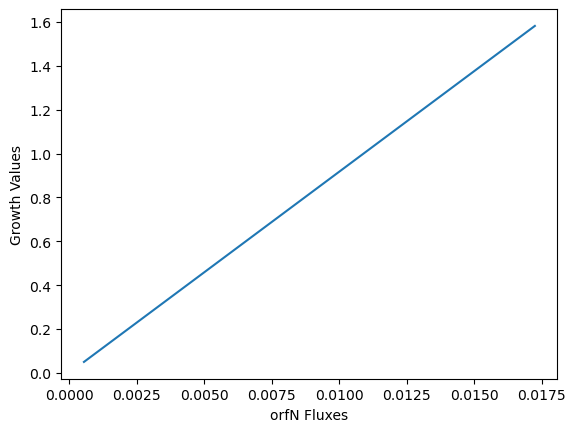

In [63]:
plt.plot(orfN_growth_df["orfN Fluxes"], orfN_growth_df["Growth Values"])
plt.xlabel("orfN Fluxes")
plt.ylabel("Growth Values")
plt.show()